In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
file_path = "/content/NIFTY 50.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2025-02-14 to 2024-02-19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  249 non-null    object 
 1   Open        249 non-null    float64
 2   High        249 non-null    float64
 3   Low         249 non-null    float64
 4   Close       249 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.7+ KB
None
           Index Name      Open      High       Low     Close
Date                                                         
2025-02-14   NIFTY 50  23096.45  23133.70  22774.85  22929.25
2025-02-13   NIFTY 50  23055.75  23235.50  22992.20  23031.40
2025-02-12   NIFTY 50  23050.80  23144.70  22798.35  23045.25
2025-02-11   NIFTY 50  23383.55  23390.05  22986.65  23071.80
2025-02-10   NIFTY 50  23543.80  23568.60  23316.30  23381.60


In [4]:
print(df.isnull().sum())

Index Name    0
Open          0
High          0
Low           0
Close         0
dtype: int64


In [5]:
df.fillna(method="ffill", inplace=True)
df.dropna(inplace=True)

<ipython-input-5-96eee84d787f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [6]:
z_scores = np.abs(zscore(df[["Open", "High", "Low", "Close"]]))
threshold = 3
outlier_mask = (z_scores < threshold).all(axis=1)

In [8]:
print(f"Number of outliers detected using Z-score: {(~outlier_mask).sum()}")

numerical_cols = ["Open", "High", "Low", "Close"]
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

Number of outliers detected using Z-score: 0


In [9]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[numerical_cols].apply(lambda x: (x < lower_bound[x.name]) | (x > upper_bound[x.name]), axis=0)


In [10]:
median_value = df[numerical_cols].median()
df[numerical_cols] = df[numerical_cols].mask(outliers, median_value, axis=1)

print(df.head())

           Index Name      Open      High       Low     Close
Date                                                         
2025-02-14   NIFTY 50  23096.45  23133.70  22774.85  22929.25
2025-02-13   NIFTY 50  23055.75  23235.50  22992.20  23031.40
2025-02-12   NIFTY 50  23050.80  23144.70  22798.35  23045.25
2025-02-11   NIFTY 50  23383.55  23390.05  22986.65  23071.80
2025-02-10   NIFTY 50  23543.80  23568.60  23316.30  23381.60


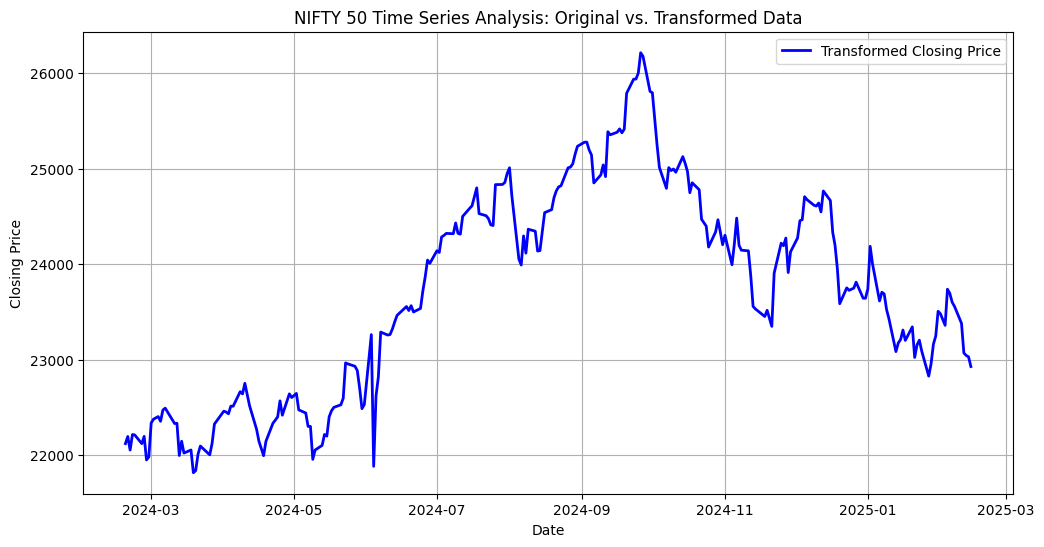

In [13]:
plt.figure(figsize=(12, 6))
#plt.plot(df.index, df["Original Close"], label="Original Closing Price", color="red", linestyle="dashed", alpha=0.6)
plt.plot(df.index, df["Close"], label="Transformed Closing Price", color="blue", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("NIFTY 50 Time Series Analysis: Original vs. Transformed Data")
plt.legend()
plt.grid()
plt.show()